# IST 691 Deep Learning in Practice

**Homework 2**

Name: Francisco del Castillo

SUID: 425920951

*Complete this assignment in Google Colab. The notebook has appropriate comments at the top of code cells to indicate whether you need to modify them or not. Answer your questions directly in the notebook. Remember to use the GPU as your runtime. Prior to submitting a copy of this notebook (.ipynb format), run every cell and ensure you have corrected all runtime errors. As always, you must do your own work. This means you may not use answers to the following questions generated by any other person or a generative AI tool such as ChatGPT. You may, however, discuss this assignment with others in a general way and seek help when you need it, but, again, you must do your own work.*

### Q1

Explain the differences between convolutional neural networks and a multi-layer perceptron. Explain whether the following statement is true, and if true, when it could be true.

'An MLP can represent the same functions as a CNN.'

**Answer:**

No, an MLP cannot perform all the functions that a CNN can.

While both MLPs and CNNs take inputs and produce outputs, and both can process image data, CNNs have capabilities that MLPs lack, such as preserving spatial structure and achieving translation invariance.

One key difference is that an MLP flattens an image into a vector of pixels, losing the spatial relationships between pixels. This is problematic because neighboring pixels often carry important information about the image, and their proximity reflects meaningful patterns. In contrast, CNNs preserve the spatial structure of an image by applying a sliding window (also called a kernel or filter) over the image. This allows CNNs to detect local patterns and then pass that information to later layers, often a fully connected MLP. Therefore, CNNs can maintain spatial relationships, which is something an MLP cannot do.

Another major difference is translation invariance, a property of CNNs. The filters in CNNs are learned during training, enabling the network to detect important patterns regardless of where they appear in the image. This is crucial because the CNN can recognize a feature (like an edge or a shape) even if it appears in different parts of the image. This is translation in variance. This preprocessing and feature extraction capability of CNNs is not something MLPs can perform on their own.

In summary, MLPs cannot replicate the spatial structure preservation and translation invariance that CNNs offer. So, a MLP cannot perform the same functions as CNN.

### Q2

In class, we saw an example of autoencoders being able to remove the noise of an image. Explain why this happens and what the limits of such funcionality are.

**Answer:**

Autoencoders work by capturing the essence of the data in a compressed set of latent variables through an encoder, and then reconstructing the data with a decoder. In a denoising autoencoder, the model is trained on noisy versions of the data (for example, images) and learns to output the clean, noise-free version of the image. This is a learning task, where the goal is for the encoder to learn how to retain only the important features of the image and discard the noise, so that the decoder can reconstruct the clean image. Essentially, the encoder filters out the noise by not encoding it, which means the decoder does not consider it when generating the output. As a result, we get a cleaned version of the input image, where the noise has been effectively removed.

One of the main limitations of autoencoders is that their performance is highly dependent on the data used during training, which can lead to overfitting. In the book, we saw an example where an autoencoder trained with a lion image always produced the lion image as output, regardless of the input. This shows that autoencoders can fail to generalize if the training data is not diverse enough.

If an autoencoder is trained on a narrow type of noise, it will only be able to remove that specific type of noise. For example, if the model is trained to remove white noise, it may struggle to denoise images with other types of noise, such as reflections or motion blur. This limitation means that during training, it is important to account for the different types of noise the autoencoder will encounter in real-world scenarios. Using data augmentation techniques to expose the autoencoder to various noise patterns can help it generalize better and improve performance once deployed.

### Q3

When using transfer learning models, sometimes we get better results by fine-tuning, and some other times we get better results by freezing the parameters before training. Under what circumstances should we fine-tune the model in order to get a better result? And, under what circumstances should we freeze the parameters instead?

**Answer:**

It depends on the task at hand.

Fine-tuning is useful when the task is complex or significantly different from the model’s original training objectives. In these cases, fine-tuning the model’s allows it to learn task-specific features and improve performance. Fine-tuning is also valuable for addressing limitations in the original model, such as biases and preconceptions that may have been introduced during its initial training.

For example, if you’re using a model to classify a rare type of tree that it was not originally trained on, fine-tuning the last layer or additional layers may improve accuracy. This extra training enables the model to better identify unique features of the tree type. Similarly, if your task deviates substantially from the model's original purpose (e.g., translating sign language to speech), fine-tuning is beneficial. Here, a model like VGG-16 might initially be used to recognize hands, but it would need fine-tuning to identify specific hand shapes or signs for effective translation. Fine-tuning in such cases helps align the model with the new task's requirements.

Freezing parameters is efficient when the task aligns with the original training objective. If the model’s current knowledge is enough to achieve good performance on the task, freezing the layers can save time and resources, as it avoids recalculating weights and biases. For example, if you only need the model to identify whether an object is a person, freezing parameters is effective since the model likely already has a well-trained understanding of human features.

Overfitting is another important factor. If your target labels are uncommon or if you have limited data, fine-tuning can lead to overfitting, where the model becomes too specialized to the specific training examples. In such cases, freezing layers can help maintain generalization. On the other hand, if your dataset is large and includes commonly found target labels, fine-tuning is less likely to cause overfitting and can improve performance without sacrificing generalization.



### Q4: MLP vs CNN

Below, there are two neural networks for classifying MNIST digits: `model_mlp`  is an MLP with no hidden layers (the smallest possible) and 7,850 parameters. Evaluate the performance of this model below.

Then, define a convolutional neural network with similar a number of parameters and evaluate its performance. Can it do better? Why?

**Answer:** see the next question

In [ ]:
# DO NOT MODIFY THIS CELL

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model_mlp = keras.Sequential(
    [
        keras.Input(shape = input_shape),
        layers.Flatten(),
        layers.Dense(num_classes, activation = 'softmax'),
    ]
)

model_mlp.summary()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# DO NOT MODIFY CELL
batch_size = 128
epochs = 15
model_mlp.compile(loss = 'categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])

model_mlp.fit(x_train,
              y_train,
              batch_size = batch_size,
              epochs = epochs,
              validation_split = 0.1,
              verbose = 1)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7159 - loss: 1.0891 - val_accuracy: 0.9123 - val_loss: 0.3497
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8950 - loss: 0.3962 - val_accuracy: 0.9215 - val_loss: 0.2867
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9094 - loss: 0.3371 - val_accuracy: 0.9278 - val_loss: 0.2621
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9118 - loss: 0.3188 - val_accuracy: 0.9322 - val_loss: 0.2508
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9155 - loss: 0.3003 - val_accuracy: 0.9345 - val_loss: 0.2438
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9205 - loss: 0.2878 - val_accuracy: 0.9352 - val_loss: 0.2396
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9242 - loss: 0.2739 - val_accuracy: 0.9373 - val_loss: 0.2328
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9242 - loss: 0.2735 - val_accuracy: 0.

In [ ]:
# DO NOT MODIFY CELL
score = model_mlp.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2647726833820343
Test accuracy: 0.9266999959945679


In [ ]:
# DEFINE YOUR OWN CNN SO THAT THE PARAMETERS ARE FEWER THAN THE MLP

model_cnn = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(12, (3, 3), activation = 'relu', padding = 'same'),
        layers.Conv2D(12, (3, 3),strides=(1, 1), activation = 'relu', padding = 'same'),
        layers.MaxPooling2D((2,2), padding = 'same'),
        layers.Dropout(0.2),
        layers.Conv2D(10, (3, 3), activation = 'relu', padding = 'same'),
        #layers.Conv2D(10, (3, 3), activation = 'relu', padding = 'same'),
        layers.MaxPooling2D((2,2), padding = 'same'),
        layers.Dropout(0.2),
        layers.Conv2D(8, (3, 3), activation = 'relu', padding = 'same'),
        layers.Conv2D(8, (3, 3), activation = 'relu', padding = 'same'),
        #layers.Conv2D(8, (3, 3), activation = 'relu', padding = 'same'),

        layers.Flatten(),
        layers.Dense(num_classes, activation = 'softmax'),
    ]
)

model_cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 12)          │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 12)          │           1,308 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 12)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 12)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 10)          │           1,090 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 10)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 10)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 8)             │             728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 392)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           3,930 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,760 (30.31 KB)

 Trainable params: 7,760 (30.31 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# DO NOT MODIFY CELL
batch_size = 128
epochs = 15
model_cnn.compile(loss = 'categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])
model_cnn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=1)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.6553 - loss: 1.0435 - val_accuracy: 0.9695 - val_loss: 0.1249
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9432 - loss: 0.1843 - val_accuracy: 0.9788 - val_loss: 0.0772
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9610 - loss: 0.1219 - val_accuracy: 0.9810 - val_loss: 0.0677
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9683 - loss: 0.1035 - val_accuracy: 0.9842 - val_loss: 0.0582
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9718 - loss: 0.0889 - val_accuracy: 0.9857 - val_loss: 0.0509
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9748 - loss: 0.0813 - val_accuracy: 0.9848 - val_loss: 0.0584
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9760 - loss: 0.0745 - val_accuracy: 0.9895 - val_loss: 0.0434
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9785 - loss: 0.0697 - val_accuracy:

In [ ]:
# DO NOT MODIFY CELL
score = model_cnn.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.030561838299036026
Test accuracy: 0.9902999997138977


**Did the CNN do better than the MLP? Why or why not?**

**Answer:**

Yes, the CNN performed better because it preserves the spatial structure of the images and achieves translation invariance thanks to the filters and maxpooling. Preserving spatial structure allows the CNN to recognize important patterns, such as curves or edges, while maintaining the relationships between neighboring pixels. In contrast, an MLP flattens the image into a one-dimensional vector, which destroys these spatial relationships.

Translation invariance is also crucial because a number can appear anywhere in the image or may be rotated. The CNN's ability to identify patterns regardless of their position significantly improves its performance compared to the MLP.


### Q5: Transfer learning

We are going to classify beans using transfer learning (read more about the dataset [here](https://www.tensorflow.org/datasets/catalog/beans). In the code below, use the `ResNet50` model available in Keras to classify the beans dataset (3 classes). **Do not fine tune `ResNet50`**. What is the performance?

**Answer:** 87.5% test accuracy which is good.

In [ ]:
# DO NOT MODIFY CELL
! pip install datasets
from datasets import load_dataset
beans = load_dataset('beans')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/4.95k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/144M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/18.5M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/17.7M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1034 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/133 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/128 [00:00<?, ? examples/s]

In [ ]:
# DO NOT MODIFY CELL
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

train_images_np = np.array([np.array(img) for img in beans['train']['image']])
test_images_np = np.array([np.array(img) for img in beans['test']['image']])

train_ds = tf.convert_to_tensor(train_images_np)
test_ds = tf.convert_to_tensor(test_images_np)

# resizing images
train_ds = tf.image.resize(train_ds, (224, 224))
test_ds = tf.image.resize(test_ds, (224, 224))

train_labels = beans['train']['labels']
test_labels = beans['test']['labels']

# transforming labels to correct format
train_labels = to_categorical(train_labels, num_classes = 3)
test_labels = to_categorical(test_labels, num_classes = 3)

In [ ]:
# IMPORT THE APPROPRIATE MODEL HERE
from tensorflow.keras.applications  import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

## loading ResNet50 model
base_model = ResNet50(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))
base_model.trainable = False

## preprocessing input
train_ds = preprocess_input(train_ds)
test_ds = preprocess_input(test_ds)

from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
prediction_layer = layers.Dense(3, activation = 'softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    layers.Dropout(0.2),
    prediction_layer
])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
# DO NOT MODIFY CELL
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras

model.compile(
    optimizer = keras.optimizers.Adam(),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'],
)

In [ ]:
# DO NOT MODIFY CELL
model.fit(train_ds, train_labels, epochs = 5, validation_split = 0.2, batch_size = 64)

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.5398 - loss: 6.9989 - val_accuracy: 0.9034 - val_loss: 2.7505
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 211ms/step - accuracy: 0.9003 - loss: 1.1851 - val_accuracy: 0.6087 - val_loss: 10.4112
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 215ms/step - accuracy: 0.9669 - loss: 0.2791 - val_accuracy: 0.9517 - val_loss: 0.8744
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 211ms/step - accuracy: 0.9806 - loss: 0.1266 - val_accuracy: 0.8986 - val_loss: 2.3298
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - accuracy: 0.9948 - loss: 0.0166 - val_accuracy: 0.8937 - val_loss: 2.5281


In [ ]:
# DO NOT MODIFY CELL
score = model.evaluate(test_ds, test_labels, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.1940879821777344
Test accuracy: 0.875


### Q6: Autoencoder

Modify the convolutional autoencoder for MNIST we saw in class so that the embedding has the following structure:
- Conv2D: 8 filters, Kernel (3, 3)
- MaxPooling: Size (2, 2)
- Conv2D: 3 filters, Kernel (3, 3)
- MaxPooling: Size (2, 2)
- Conv2D: 1 filters, Kernel (3, 3)

After making this change, you need to change the input size of the decoder function so that it can accept the output of the encoder. What is the performance of your model?

**Answer:**

The result is good, especially considering that we are reducing the input by a factor of 4 (from 28x28 to 7x7). While the output is more pixelated than the input, the numbers remain recognizable. Some loss of detail is expected in this compression, for instance: we can observe this in the top part of the digit "2" in the output but it remains recognizable.

In [ ]:
# DO NOT MODIFY THIS CELL
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense
import numpy as np
import h5py
from pathlib import Path
import matplotlib.pyplot as plt

from keras import backend as keras_backend
keras_backend.set_image_data_format('channels_last')
from keras.models import Sequential, Model
from keras.layers import Conv2D, Dense, Input, MaxPooling2D, UpSampling2D
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import h5py

import tensorflow as tf


# data now has a different shape
random_seed = 42
np.random.seed(random_seed)

# load the MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
image_height = X_train.shape[1]
image_width = X_train.shape[2]
number_of_pixels = image_height * image_width

# cast the sample data to the current Keras floating-point type
X_train = tf.cast(X_train, dtype=tf.keras.backend.floatx())
X_test = tf.cast(X_test, dtype=tf.keras.backend.floatx())

# reshape to 2D grid, one line per image
X_train = tf.reshape(X_train, (X_train.shape[0], number_of_pixels))
X_test = tf.reshape(X_test, (X_test.shape[0], number_of_pixels))

# scale data to range [0, 1]
X_train /= 255.0
X_test /= 255.0

# reshape sample data to 4D tensor using channels_last convention
X_train = tf.reshape(X_train, (X_train.shape[0], image_height, image_width, 1))
X_test = tf.reshape(X_test, (X_test.shape[0], image_height, image_width, 1))

# replace label data with one-hot encoded versions
number_of_classes = 1 + max(np.append(y_train, y_test))
y_train = to_categorical(y_train, number_of_classes)
y_test = to_categorical(y_test, number_of_classes)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# MODIFY THE ENCODER BELOW ACCORDING TO THE QUESTION REQUIREMENTS
CAE_encoder_conv_1 = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')
CAE_encoder_pool_1 = MaxPooling2D((2,2), padding = 'same')
CAE_encoder_conv_2 = Conv2D(3, (3, 3), activation = 'relu', padding = 'same')
CAE_encoder_pool_2 = MaxPooling2D((2,2), padding = 'same')
CAE_encoder_output = Conv2D(1, (3, 3), activation = 'relu', padding = 'same')


In [ ]:
# DO NOT MODIFY THIS CELL
CAE_decoder_up_1 = UpSampling2D((2,2))
CAE_decoder_conv_1 = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')
CAE_decoder_up_2 = UpSampling2D((2,2))
CAE_decoder_output = Conv2D(1, (3, 3), activation = 'sigmoid', padding = 'same')

CAE_encoder_input = Input(shape=(28, 28, 1))
CAE_encoder_step_1 = CAE_encoder_conv_1(CAE_encoder_input)
CAE_encoder_step_2 = CAE_encoder_pool_1(CAE_encoder_step_1)
CAE_encoder_step_3 = CAE_encoder_conv_2(CAE_encoder_step_2)
CAE_encoder_step_4 = CAE_encoder_pool_2(CAE_encoder_step_3)
CAE_encoder_step_5 = CAE_encoder_output(CAE_encoder_step_4)

CAE_decoder_step_1 = CAE_decoder_up_1(CAE_encoder_step_5)
CAE_decoder_step_2 = CAE_decoder_conv_1(CAE_decoder_step_1)
CAE_decoder_step_3 = CAE_decoder_up_2(CAE_decoder_step_2)
CAE_decoder_step_4 = CAE_decoder_output(CAE_decoder_step_3)


Conv_AE = Model(CAE_encoder_input, CAE_decoder_step_4)
Conv_AE.compile(optimizer = 'adam', loss = 'binary_crossentropy')


Conv_AE_encoder_only_model = Model(CAE_encoder_input, CAE_encoder_step_5)

In [ ]:
# MODIFY THE INPUT FOR THE DECODER BELOW ACCORDING TO THE OUTPUT EXPECTED FROM THE ENCODER
Conv_AE_decoder_only_input = Input(shape=(7, 7, 1))

In [ ]:
# DO NOT MODIFY THIS CELL
Conv_AE_decoder_only_step_1 = CAE_decoder_up_1(Conv_AE_decoder_only_input)
Conv_AE_decoder_only_step_2 = CAE_decoder_conv_1(Conv_AE_decoder_only_step_1)
Conv_AE_decoder_only_step_3 = CAE_decoder_up_2(Conv_AE_decoder_only_step_2)
Conv_AE_decoder_only_step_4 = CAE_decoder_output(Conv_AE_decoder_only_step_3)

Conv_AE_decoder_only_model = Model(Conv_AE_decoder_only_input, Conv_AE_decoder_only_step_4)

In [ ]:
# DO NOT MODIFY THIS CELL
# FIT AND EVALUATE PERFORMANCE
Conv_AE.fit(X_train, X_train,
               epochs = 50, batch_size = 128, shuffle = True,
               verbose = 2,
               validation_data = (X_test, X_test))

Epoch 1/50
469/469 - 11s - 24ms/step - loss: 0.2806 - val_loss: 0.1505
Epoch 2/50
469/469 - 2s - 4ms/step - loss: 0.1415 - val_loss: 0.1355
Epoch 3/50
469/469 - 2s - 5ms/step - loss: 0.1332 - val_loss: 0.1302
Epoch 4/50
469/469 - 3s - 6ms/step - loss: 0.1293 - val_loss: 0.1274
Epoch 5/50
469/469 - 2s - 4ms/step - loss: 0.1274 - val_loss: 0.1259
Epoch 6/50
469/469 - 2s - 5ms/step - loss: 0.1261 - val_loss: 0.1246
Epoch 7/50
469/469 - 1s - 3ms/step - loss: 0.1249 - val_loss: 0.1235
Epoch 8/50
469/469 - 3s - 7ms/step - loss: 0.1240 - val_loss: 0.1229
Epoch 9/50
469/469 - 2s - 4ms/step - loss: 0.1234 - val_loss: 0.1223
Epoch 10/50
469/469 - 1s - 3ms/step - loss: 0.1229 - val_loss: 0.1218
Epoch 11/50
469/469 - 1s - 3ms/step - loss: 0.1225 - val_loss: 0.1214
Epoch 12/50
469/469 - 1s - 3ms/step - loss: 0.1221 - val_loss: 0.1213
Epoch 13/50
469/469 - 1s - 3ms/step - loss: 0.1217 - val_loss: 0.1207
Epoch 14/50
469/469 - 1s - 2ms/step - loss: 0.1214 - val_loss: 0.1204
Epoch 15/50
469/469 - 1s - 

In [ ]:
# DO NOT MODIFY THIS CELL
def draw_predictions_set(predictions, filename=None):
    X_test_numpy = X_test.numpy()
    plt.figure(figsize=(8, 4))
    for i in range(5):
        plt.subplot(2, 5, i+1)
        plt.imshow(X_test_numpy[i].reshape(28, 28), vmin=0, vmax=1, cmap='gray')
        ax = plt.gca()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.subplot(2, 5, i + 6)
        plt.imshow(predictions[i].reshape(28, 28), vmin=0, vmax=1, cmap='gray')
        ax = plt.gca()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.tight_layout()
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


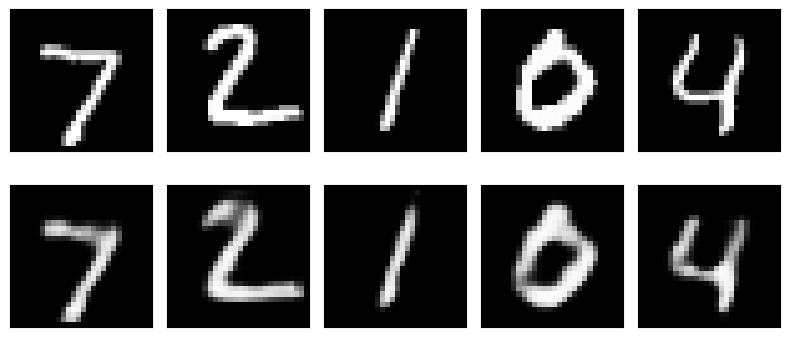

In [ ]:
# Test your new predictions
Conv_predictions = Conv_AE.predict(X_test)

draw_predictions_set(Conv_predictions, 'NB3-ConvAE-predictions')
